Load and Display CiFar10 dataset

In [1]:
 import torch
 import torchvision
 from torchvision import datasets, transforms

In [3]:
"""
transforms.ToTensor(): Converts the dataset to tensor
transforms.Normalize(mean, std): Normalizes each image of dataset by 
manipulating each channel (3) by subtracting the mean by 0.5 and dividing 
the standard deviation by 0.5 
to make sure pixel values are in range [-1, 1] 
"""
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
"""
Here, datasets are formed by importing CiFar10 image dataset and respective 
labels (classes) into /data/ folder
"""
trainset = datasets.CIFAR10("~/data",
                            download=True,
                            train=True,
                            transform=transform)
testset = datasets.CIFAR10("~/data",
                           download=True,
                           train=True,
                           transform=transform)

100%|██████████| 170498071/170498071 [00:06<00:00, 25602482.81it/s]


Extracting /root/data/cifar-10-python.tar.gz to /root/data
Files already downloaded and verified


In [5]:
"""
Choose an appropriate batch size to load the data in batches.
DataLoader does not matter in case of small datasets, but it could be efficient 
in loading data for larger datasets such as CiFar.
It basically loads data in batches of batch size BATCH_SIZE (mutable).
 Moreover, it can shuffle the data as well (shuffle=True).
"""
BATCH_SIZE = 5
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)

In [6]:
"""
Almighty Libraries other than _cv2_ to display images
"""
import numpy as np
import matplotlib.pyplot as plt

In [8]:
"""
- Function imshow() takes the image as input, unnormalizes it by multiplying 
  standard deviation by 2 (because during normalization we divided it by 2)
  adds the mean of 0.5 (we subtracted the mean by 0.5 during normalization)
- image.numpy(): converts the image tensor to numpy image array 
  (as we converted it to tensors using transform.ToTensor())
- Now we initialize the subplots just for the sake of displaying labels as well.
- Labels will be displayed as title of the subplots
"""
def imshow(image, title):
  image = image/2 + 0.5
  npimg = image.numpy()
  fig, ax = plt.subplots()
  ax.imshow(np.transpose(npimg, (1, 2, 0)))
  ax.set_title(title)
  plt.show()

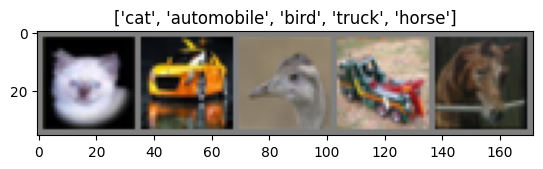

In [9]:
"""
- next(iter()) is just an easy way of traversersing through loaded data as we 
  loaded them in batches.
- The good thing is every time we will get a random set of images as we run this
  section as in DataLoader() we already are shuffling the data.
- Now, we will display the images in the form of grid and extract labels of 
  those particular images and state them as title 
"""
images, labels = next(iter(trainloader))
imshow(torchvision.utils.make_grid(images), [trainset.classes[i] for i in labels])